In [246]:
import numpy as np
import pandas as pd
import time
import networkx as nx
from networkx import DiGraph
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import scipy.linalg

eps = 1.0e-9

In [2]:
def gauss_jordan(a, b):
    a = np.array(a, float)
    b = np.array(b, float)
    n = len(b)
    
    for k in range(n):
        pivot = a[k, k]
        if np.fabs(pivot) < eps:
            for i in range(k + 1, n):
                if np.fabs(a[i, k]) > eps:
                   a[[k, i]] = a[[i, k]]
                   b[k], b[i] = b[i], b[k]
                   pivot = a[k, k]
                   break
        a[k] = a[k] / pivot
        b[k] = b[k] / pivot
        
        for i in range(0, n):
            if i == k or np.fabs(a[i, k]) < eps:
                continue
            factor = a[i, k]
            a[i] = a[i] - (factor * a[k])
            b[i] = b[i] - (factor * b[k])
            
    return b, a

In [3]:
def gauss_jordan_with_scaling(a, b):
    a = np.array(a, float)
    b = np.array(b, float)
    n = len(b)
    
    for k in range(n):
        maxx = np.fabs(b[k])
        
        for i in range(n):
            if np.fabs(a[k][i]) > maxx:
                maxx = np.fabs(a[k][i])
        
        a[k] = a[k] / maxx
        b[k] = b[k] / maxx
        
        pivot = a[k, k]
        ## If pivot is 0 then we find first non-zero row and swap.
        if np.fabs(pivot) < eps:
            for i in range(k + 1, n):
                if np.fabs(a[i, k]) > eps:
                   a[[k, i]] = a[[i, k]]
                   b[k], b[i] = b[i], b[k]
                   pivot = a[k, k]
                   break
        a[k] = a[k] / pivot
        b[k] = b[k] / pivot
        
        for i in range(0, n):
            if i == k or np.fabs(a[i, k]) < eps:
                continue
            factor = a[i, k]
            a[i] = a[i] - (factor * a[k])
            b[i] = b[i] - (factor * b[k])
            
    return b, a

In [4]:
def gauss_jordan_with_partial_pivoting(a, b):
    a = np.array(a, float)
    b = np.array(b, float)
    n = len(b)
    
    for k in range(n):        
        pivot = np.fabs(a[k, k])
        index = k
        for i in range(k + 1, n):
            if np.fabs(a[i, k]) > pivot:
              index = i
              pivot = np.fabs(a[i, k])
        
        if index != k:
            a[[k, index]] = a[[index, k]]
            b[k], b[index] = b[index], b[k]
            pivot = a[k, k]
        
        a[k] = a[k] / pivot
        b[k] = b[k] / pivot
        
        for i in range(0, n):
            if i == k or np.fabs(a[i, k]) < eps:
                continue
            factor = a[i, k]
            a[i] = a[i] - (factor * a[k])
            b[i] = b[i] - (factor * b[k])
            
    return b, a

In [45]:
a = [[0, 2, 0, 1], [2, 2, 3, 2], [4, -3, 0, 1], [6, 1, -6, -5]]
b = [0, -2, -7, 6]

X, A = gauss_jordan(a, b)
C, D = gauss_jordan_with_scaling(a, b)
E, F = gauss_jordan_with_partial_pivoting(a, b)

print("Gauss Jordan           ", X)
print("Numpy Solution         ", np.linalg.solve(a, b))
print("With Scaling           ", C)
print("With Partial pivoting  ", E)

Gauss Jordan            [-0.5         1.          0.33333333 -2.        ]
Numpy Solution          [-0.5         1.          0.33333333 -2.        ]
With Scaling            [-0.5         1.          0.33333333 -2.        ]
With Partial pivoting   [-0.5         1.          0.33333333 -2.        ]


In [6]:
def test(a, b):
    start = time.time()
    X, A = gauss_jordan(a, b)
    end = time.time()
    time1 = end - start
    
    start = time.time()
    X = np.linalg.solve(a, b)
    end = time.time()
    time2 = end - start
    
    return time2, time1

In [56]:
df = pd.DataFrame(columns = ['N', 'Numpy time', 'My time'])
for i in range(1, 10):
    n = i * 100
    a = np.random.rand(n, n)
    b = np.random.rand(n)
    
    numpy_time, my_time = test(a, b)
    
    row = {
        'N': n,
        'Numpy time': numpy_time,
        'My time': my_time
    }
     
    series = pd.Series(data = row, name = 'x')
    df = df.append(series, ignore_index = False)
    
df

,N,Numpy time,My time
x,100.0,0.000195,0.067569
x,200.0,0.000684,0.261762
x,300.0,0.002007,0.743834
x,400.0,0.002409,1.215598
x,500.0,0.002121,1.982436
x,600.0,0.005212,3.238851
x,700.0,0.061224,4.692816
x,800.0,0.010994,6.840780
x,900.0,0.016667,8.256598


In [57]:
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &      N &  Numpy time &   My time \\
\midrule
x &  100.0 &    0.000195 &  0.067569 \\
x &  200.0 &    0.000684 &  0.261762 \\
x &  300.0 &    0.002007 &  0.743834 \\
x &  400.0 &    0.002409 &  1.215598 \\
x &  500.0 &    0.002121 &  1.982436 \\
x &  600.0 &    0.005212 &  3.238851 \\
x &  700.0 &    0.061224 &  4.692816 \\
x &  800.0 &    0.010994 &  6.840780 \\
x &  900.0 &    0.016667 &  8.256598 \\
\bottomrule
\end{tabular}



In [38]:
def lu_factorization(A):
    n = len(A) 
    L = [[0 for i in range(n)] for i in range(n)]
    for i in range(0,n):
        L[i][i] = 1

    U = [[0 for i in range(0,n)] for i in range(n)]
    for i in range(0,n):
        for j in range(0,n):
            U[i][j] = A[i][j]
    
    U = np.array(U, dtype = np.float)
    L = np.array(L, dtype = np.float)
    
    for i in range(n): 
        # Find max
        maxElem = abs(U[i][i])
        maxRow = i
        for k in range(i+1, n): 
            if(abs(U[k][i]) > maxElem):
                maxElem = abs(U[k][i]) 
                maxRow = k
        
        # Swap
        for k in range(i, n): 
            tmp = U[maxRow][k]
            U[maxRow][k] = U[i][k]
            U[i][k] = tmp
        
        # Eliminate
        for k in range(i+1,n):
            multiplier = U[k][i] / U[i][i]
            L[k][i] = multiplier 
            for j in range(i, n):
                U[k][j] -= multiplier * U[i][j] 

        for k in range(i+1, n):
            U[k][i] = 0
    
    return L, U

In [39]:
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
_, sL, sU = scipy.linalg.lu(A)

print("A")
print(A)

print("Scipy - L")
print(sL)

mL, mU = lu_factorization(A)
print("My L")
print(mL)

print("Scipy - U")
print(sU)

print("My S")
print(mU)

A
[[ 7  3 -1  2]
 [ 3  8  1 -4]
 [-1  1  4 -1]
 [ 2 -4 -1  6]]
Scipy - L
[[ 1.          0.          0.          0.        ]
 [ 0.42857143  1.          0.          0.        ]
 [-0.14285714  0.21276596  1.          0.        ]
 [ 0.28571429 -0.72340426  0.08982036  1.        ]]
My L
[[ 1.          0.          0.          0.        ]
 [ 0.42857143  1.          0.          0.        ]
 [-0.14285714  0.21276596  1.          0.        ]
 [ 0.28571429 -0.72340426  0.08982036  1.        ]]
Scipy - U
[[ 7.          3.         -1.          2.        ]
 [ 0.          6.71428571  1.42857143 -4.85714286]
 [ 0.          0.          3.55319149  0.31914894]
 [ 0.          0.          0.          1.88622754]]
My S
[[ 7.          3.         -1.          2.        ]
 [ 0.          6.71428571  1.42857143 -4.85714286]
 [ 0.          0.          3.55319149  0.31914894]
 [ 0.          0.          0.          1.88622754]]


In [59]:
def testLU(A):
    start = time.time()
    L, U = lu_factorization(A)
    end = time.time()
    time1 = end - start
    
    start = time.time()
    _, sL, sU = scipy.linalg.lu(A)
    end = time.time()
    time2 = end - start
    
    return time2, time1

df = pd.DataFrame(columns = ['N', 'Scipy time', 'My time'])
for i in range(1, 5):
    n = i * 100
    A = np.random.rand(n, n)
    
    numpy_time, my_time = testLU(A)
    
    row = {
        'N': n,
        'Scipy time': numpy_time,
        'My time': my_time
    }
     
    series = pd.Series(data = row, name = 'x')
    df = df.append(series, ignore_index = False)
    
df

,N,Scipy time,My time
x,100.0,0.000244,0.345174
x,200.0,0.012697,2.615853
x,300.0,0.001271,8.152312
x,400.0,0.001881,17.481591


In [60]:
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &      N &  Scipy time &    My time \\
\midrule
x &  100.0 &    0.000244 &   0.345174 \\
x &  200.0 &    0.012697 &   2.615853 \\
x &  300.0 &    0.001271 &   8.152312 \\
x &  400.0 &    0.001881 &  17.481591 \\
\bottomrule
\end{tabular}



In [557]:
def loadGraph(filename):
    V, E, SEM = None, [], None  
    
    f = open( filename, "r" )
    lines = f.readlines()
    for l in lines:
        s = l.split()
        if s[0] == "e":
          u, v, res = (int(s[1]), int(s[2]), int(s[3]))
          E.append((u, v, res))
        elif s[0] == "V":
          V = int(s[1])
        elif s[0] == "SEM":
          SEM = (int(s[1]), int(s[2]), int(s[3]))
        else:
          raise Exception('Invalid file')
    f.close()
    
    G = nx.DiGraph()
    for i in range(V):
        G.add_node(i)
    
    for (u, v, res) in E:
        G.add_edge(u, v, weight = res)
        
    return G, SEM 

In [850]:
def solve(G: DiGraph, s, t, SEM):
    V, E = len(G), len(G.edges) # Total number of edges.
    A, b = [], []
    eqNumber = 0
            
    # Create exactly V - 2 equations.
    for i in range(V):
        if i == s or i == t or i >= E:
            continue
        
        row = np.zeros(E)
        for u, v, data in G.in_edges(i, data = True):
            row[data['id']] = 1
                        
        for u, v, data in G.out_edges(i, data = True):
            row[data['id']] = -1
            
        b.append(0)
        A.append(row)
        eqNumber    += 1
    
    # Creates 1 equation from s-t
    row = np.zeros(E)
    for u, v, data in G.out_edges(s, data = True):
        row[data['id']] = -1
        
    for u, v, data in G.in_edges(t, data = True):
        row[data['id']] = 1
    
    b.append(0)
    A.append(row)
    eqNumber += 1
    
    # Generate missing (E - V + 1) equations.
    cycles = nx.cycle_basis(G.to_undirected())
    for cycle in cycles:  
        u = cycle[0]
        row = np.zeros(E)
        for v in cycle[1:]:
            if G.has_edge(u, v):
                row[G[u][v]['id']] = G[u][v]['weight']
            else:
                row[G[v][u]['id']] = -G[v][u]['weight']
            u = v
            
        A.append(row)
        b.append(0)
        eqNumber += 1
        
    # Add equations with SEM
    pathsGenerator = nx.all_simple_paths(G, s, t)
    for path in pathsGenerator:
        row = np.zeros(E)
        u = path[0]
        for v in path[1:]:
            row[G[u][v]['id']] = G[u][v]['weight']
            u = v
            
        A.append(row)
        b.append(SEM)
        eqNumber += 1
        if eqNumber > E:
            break
        
    
    print("Generated ", eqNumber, "equations", "when number of edges is", E)
        
    b = np.array(b)
    A = np.array(A)
    I = np.linalg.inv(A.transpose() @ A) @ (A.transpose()) @ b
    for i, (u, v) in enumerate(G.edges):
        G[u][v]['i'] = I[i]
        
    return G

In [869]:
def preprocessGraph(G, s, t, SEM, setWeights = True):
    G = G.to_directed()    
    # Remove weakly connected components
    comps = nx.weakly_connected_components(G)
    toRemoveNodes = set([])
    for comp in comps:
        contS, contT = False, False
        for node in comp:
            if node == s:
                contS = True
            elif node == t:
                contT = True
            
            if contS and contT:
                break
        
        if (not contS) or (not contT):
            toRemoveNodes.update(comp)
        
    # Remove nodes which have not out or in_edges
    for node in G.nodes:
        if node == s or node == t:
            continue
        if G.in_degree(node) == 0 or G.out_degree(node) == 0:
            toRemoveNodes.add(node)
    
    for node in toRemoveNodes:
#         print(toRemoveNodes)
        G.remove_node(node)
    
    toRemove = set([])
    for (u, v) in enumerate(G.edges):
        if G.has_edge(v, u) and not((u, v) in toRemove):
            toRemove.add(v, u)
    
    # Remove edges going to source.
    for u, v in G.in_edges(s):
        toRemove.add((u, v))
    
    # Remove edges going from ground.
    for u, v in G.out_edges(t):
        toRemove.add((u, v))
    
#     print(toRemove)
    
    for edge in toRemove:
        G.remove_edge(*edge)
        
    if setWeights:
        for i, (u, v) in enumerate(G.edges):
            G[u][v]['weight'] = 5 + np.random.rand() * 10     
    
    # Assign identifier to each edge.
    for i, (u, v) in enumerate(G.edges):
        G[u][v]['id'] = i
        
    return G

In [857]:
def testSolved(G, s, t, SEM):
    V = len(G)
    mean = 0.0
    for i in range(V):
        if i == s or i == t:
            continue

        current = 0.0
        for u, v, data in G.in_edges(i, data = True):
            current += data['i']

        for u, v, data in G.out_edges(i, data = True):
            current -= data['i'] 
        
        mean += current
    
    print("Mean absolute error of calculated current", abs(mean / (V - 2)))

In [858]:
def drawSolved(G, s, t, SEM, drawValues = True):
    maxI = 0.0
    for i, (u, v) in enumerate(G.edges):
        if G[u][v]['i'] > maxI:
            maxI = G[u][v]['i']
    
    pos = nx.random_layout(G)
    plt.figure(figsize=(16, 9))
    nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                           node_color = '#009900', node_size = 500)

    edge_labels = dict([((u, v,), '{:.2f}'.format(G.get_edge_data(u, v)['i'])) for u, v in G.edges])
    width  = [(1.5 + abs(7.5 * (G.get_edge_data(u, v)['i'] / maxI))) for u, v in G.edges]
    
    colors = []
    for u, v in G.edges:
        b = min(1.0, 0.1 + (abs((G.get_edge_data(u, v)['i'] / maxI))))
        g = b
        r, a = 0.0, 1.0
        colors.append((r, g, b, a))
    
    nx.draw(G, pos, width = width,
            node_size= 600,
            edge_color = colors,
            font_size = 16,
            arrowsize = 24,
            labels = {node:node for node in G.nodes()} )
    
    if drawValues:
        nx.draw_networkx_edge_labels(G, pos,edge_labels = edge_labels,font_size=16)

Generated  5 equations when number of edges is 4
Mean absolute error of calculated current 0.0


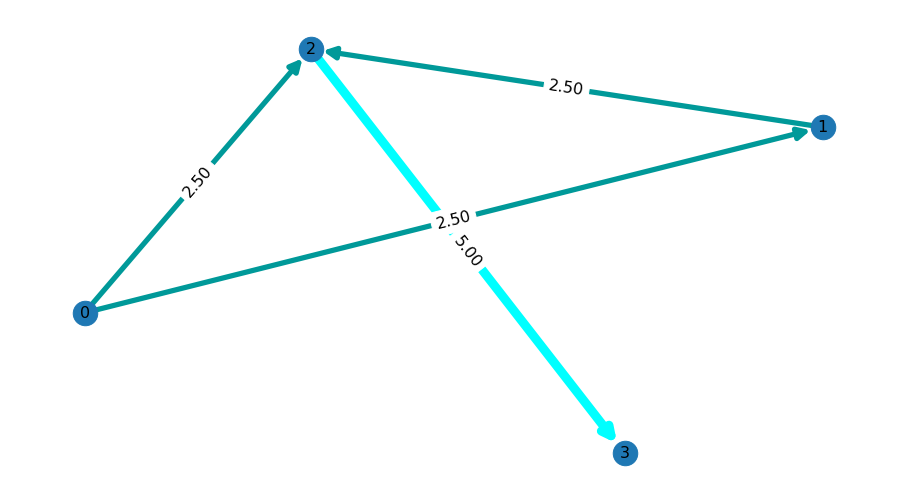

In [859]:
### Loading handwritten test

G, SEM = loadGraph('test.txt')
G = preprocessGraph(G, setWeights = False, *SEM)
G = solve(G, *SEM)    
drawSolved(G, *SEM)
testSolved(G, *SEM)

Generated  212 equations when number of edges is 211
Mean absolute error of calculated current 36.60173472943679


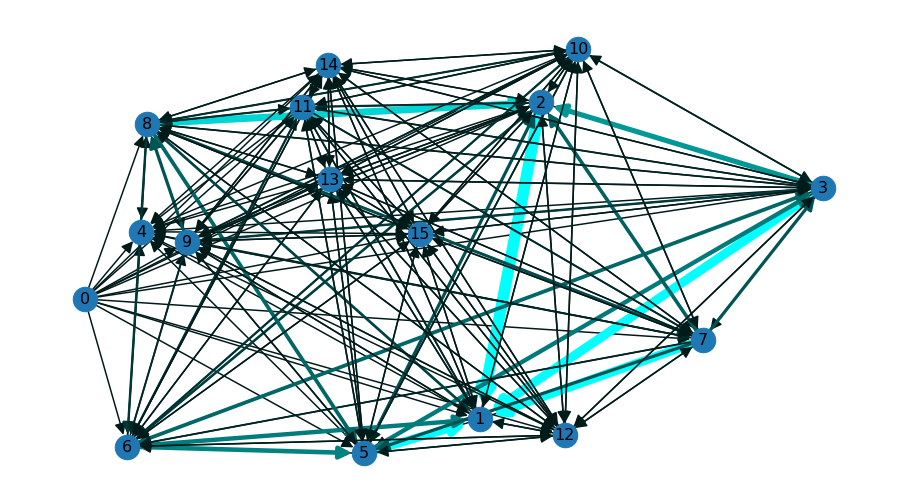

In [860]:
G = nx.fast_gnp_random_graph(16, 9)
SEM = 0, 4, 10.0
G = preprocessGraph(G, *SEM)
G = solve(G, *SEM)    
drawSolved(G, *SEM, drawValues = False)
testSolved(G, *SEM)

Generated  554 equations when number of edges is 553
Mean absolute error of calculated current 970.9923894528677


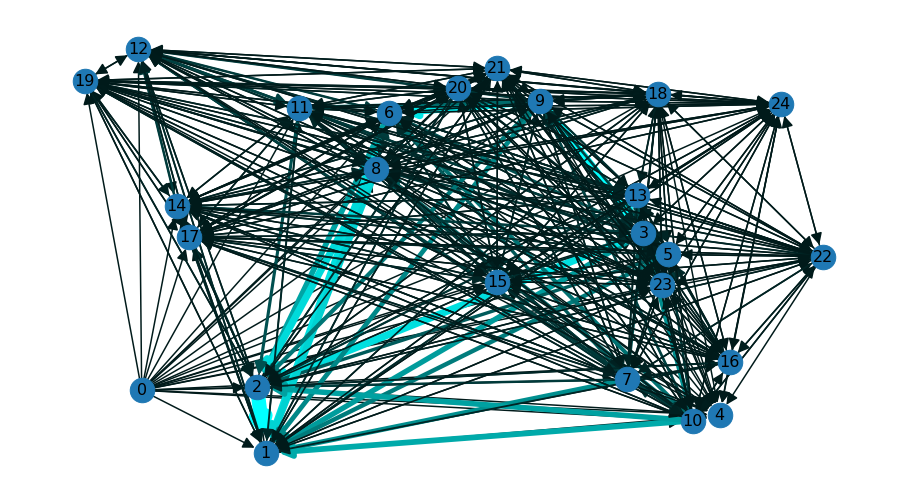

In [909]:
G = nx.complete_graph(25)
SEM = 0, 4, 100.0
G = preprocessGraph(G, *SEM)
G = solve(G, *SEM)    
drawSolved(G, *SEM, drawValues = False)
testSolved(G, *SEM)

Generated  14 equations when number of edges is 13
Mean absolute error of calculated current 0.45363372645704897


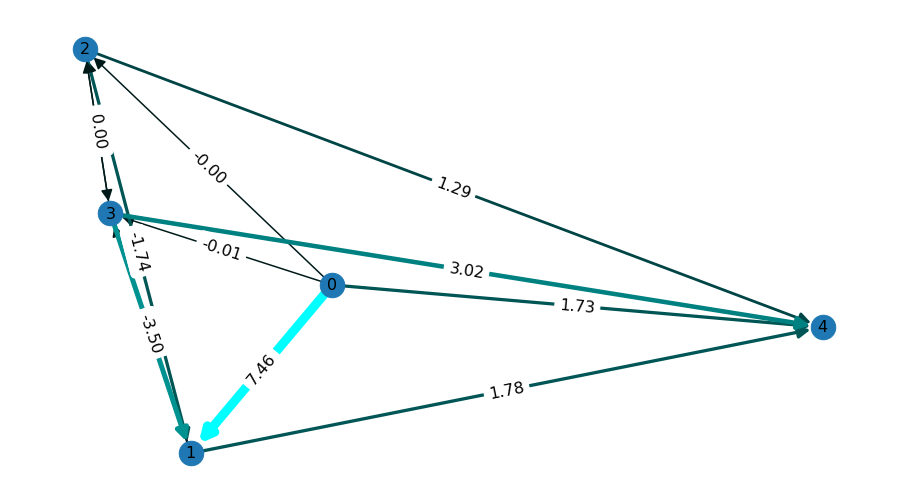

In [867]:
G = nx.complete_graph(5)
SEM = 0, 4, 100.0
G = preprocessGraph(G, *SEM)
G = solve(G, *SEM)    
drawSolved(G, *SEM)
testSolved(G, *SEM)

Generated  8 equations when number of edges is 7
Mean absolute error of calculated current 1.3596398658040485


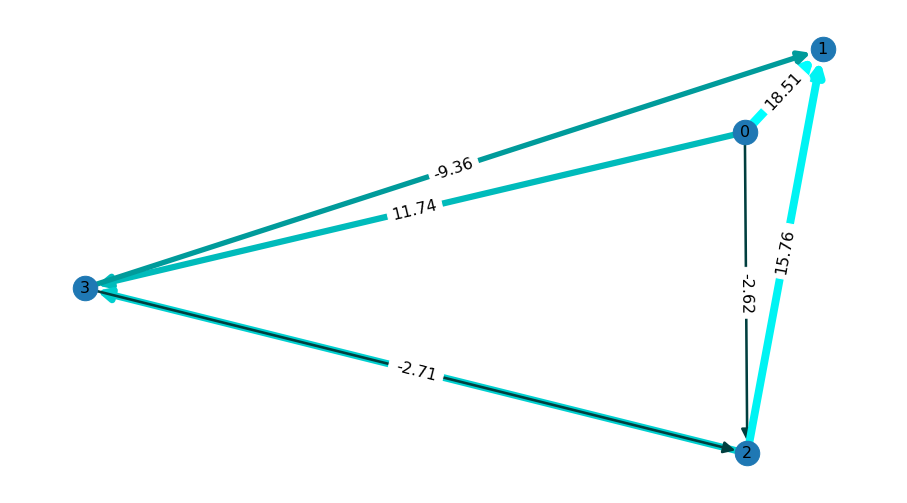

In [873]:
G = nx.tetrahedral_graph()
SEM = 0, 1, 100.0
G = preprocessGraph(G, *SEM)
G = solve(G, *SEM)    
drawSolved(G, *SEM)
testSolved(G, *SEM)

Generated  1189 equations when number of edges is 1188
Mean absolute error of calculated current 57887.3168708634


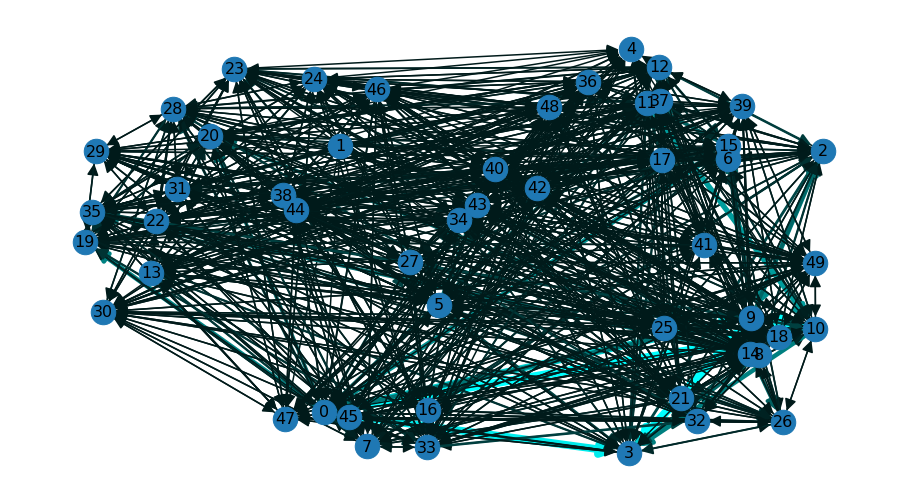

In [901]:
G = nx.binomial_graph(50, 0.5)
SEM = 1, 4, 100.0
G = preprocessGraph(G, *SEM)
G = solve(G, *SEM)    
drawSolved(G, *SEM, drawValues = False)
testSolved(G, *SEM)

Generated  7 equations when number of edges is 6
Mean absolute error of calculated current 6.114446253641667e-14


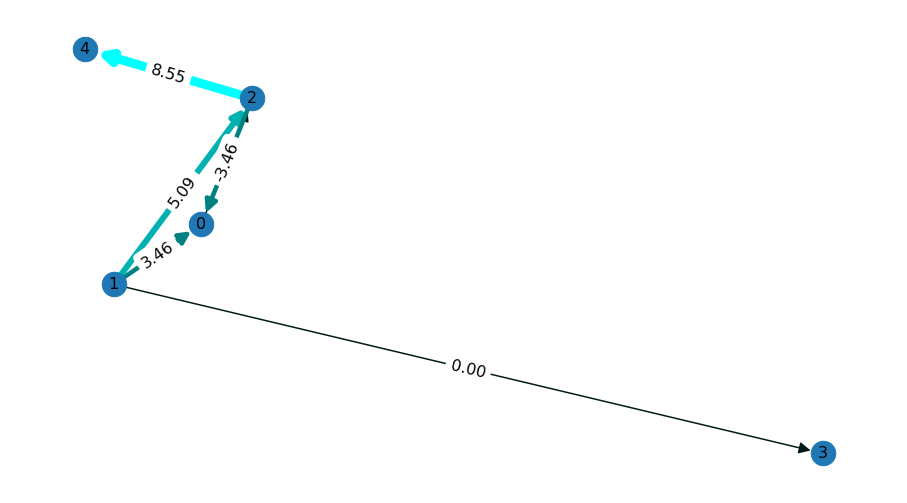

In [911]:
G = nx.bull_graph()
SEM = 1, 4, 100.0
G = preprocessGraph(G, *SEM)
G = solve(G, *SEM)    
drawSolved(G, *SEM, drawValues = True)
testSolved(G, *SEM)

Generated  37 equations when number of edges is 36
Mean absolute error of calculated current 0.6113134550171372


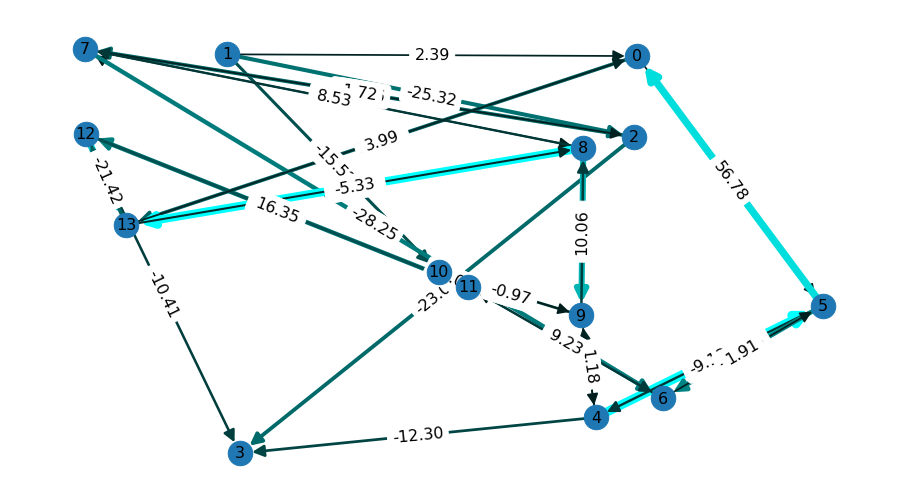

In [919]:
G = nx.heawood_graph()
SEM = 1, 3, 100.0
G = preprocessGraph(G, *SEM)
G = solve(G, *SEM)    
drawSolved(G, *SEM, drawValues = True)
testSolved(G, *SEM)